## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/ds4e/knn`

**Q0.**
1. What is the difference between regression and classification?
   * Regression is used for more continuous variables (non-discrete) while classification more so categorizes variables (discrete kinds). Both "predict" the outcomes of certain target variables with the input of other variables, but have different methods according to the sentence before.

2. What is a confusion table? What does it help us understand about a model's performance?
   * A confusion table or matrix is a table that shows how well a model may perform, by showing the frequency, probability, or percentage of false positives and false negatives (incorrect predictions) and true positives and true negatives (correct predictions). For a model, it'll help us better understand how well our model can predict outcomes and where we can improve (work on eliminated more false positives than more false negatives, etc.). It can also show us if the model is making a tremendous amount of incorrect predictions, as this might be a concern is high risk scenarios.
        
3.  What does the SSE quantify about a particular model?
   * The SSE or the sum of square errors shows how well a model fits or can predict a dataset. If the SSE is high, then we may understand that the model is not the best fit to a dataset, while a low SSE shows the contrary.

4. What are overfitting and underfitting? 
   * Overfitting is when a model is too complicated and is trained highly/closely on the training dataset. Therefore, it'll be able to predict very well the trends or patterns in the training dataset, but won't be as accurate in predicting unseen datasets. The model will be too specific and tailored to the training dataset, in other words.
   * Underfitting is when a model is now too simple to predict based on the training dataset. The model won't pick up on the important nuances and trends of the training dataset, and won't be able to predict as well on unseen datasets due to an insensitivity to these patterns. The model will be too general and won't predict as accurately as it could.

5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
   * Choosing the right k value, which is the split between which values are reserved for the training vs testing datasets, is imperative in ensuring a top-performing model ("just right"). We want the SSE to be as small as possible on the test set to indicate that the model can predict well enough on new data. By splitting the data into two sets, we can see if the model performs similarly on unseen points following the same trends. Then, we'd be able to see that the model is not overfitting nor underfitting and would most likely predict as accurately as possible on other datasets.

6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.
   * strengths of reporting a class label as a prediction: Good at making certain decisions based on data, providing a clear and direct result to the user. Choosing one label might be easier and faster for the computer to compute, as it's only keeping track of one path in a classification.
   * weaknesses of reporting a class label as a prediction: Eliminates uncertainty, which means it ignores cases where there is an almost equal chance of choosing other labels, potentially leading to misclassification.
   * strengths of reporting a probability distribution over class labels: Doesn't eliminate uncertainty, allowing the model to express confidence in multiple labels rather than forcing a single choice.
   * weaknesses of reporting a probability distribution over class labels: Not always good for making certain decisions based on data, as probability values require additional interpretation or threshold setting before taking action. This is especially unfavorable in decision trees. They might also be more difficult for humans to interpret, as 45% looks close to 50%, but that's a huge difference in large numbers.

**Q1.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

1.
price      0
year       0
mileage    0
dtype: int64
According to the 0 sums for all 3 columns, there appears to be no missing or NA values in these 3 columns.
   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654
(2499, 3)


2.
      price      year   mileage
0  0.006189  0.001973  0.269287
1  0.002848  0.001976  0.187194
2  0.005256  0.001982  0.038892
3  0.024560  0.001979  0.063016
4  0.027212  0.001982  0.006537 


3.
(1999, 2) (500, 2) (1999,) (500,)
4.


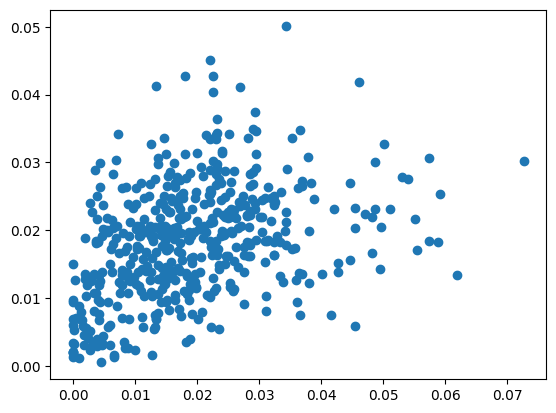

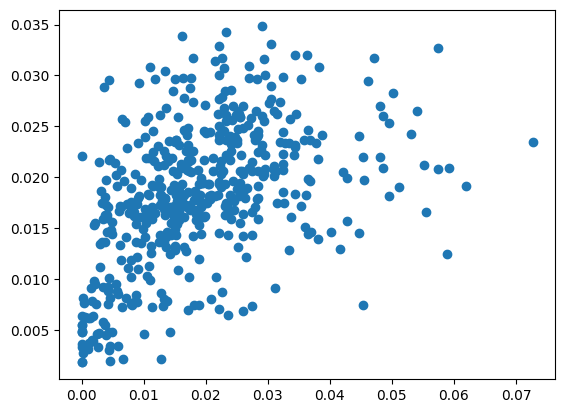

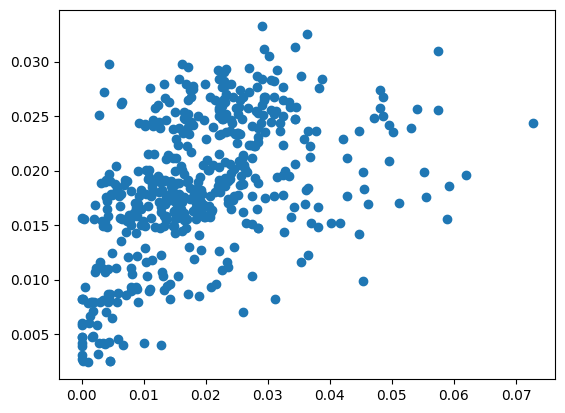

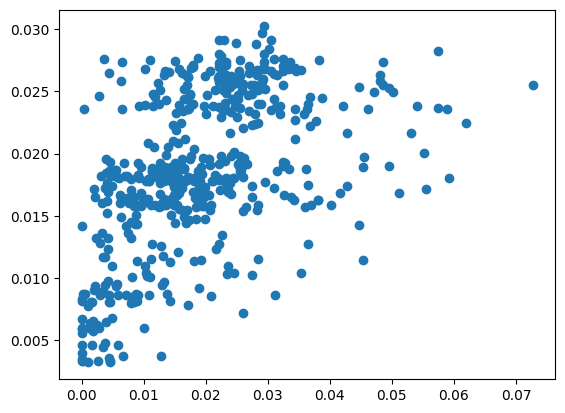

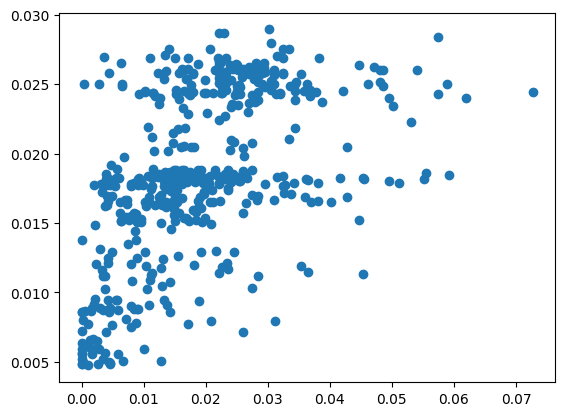

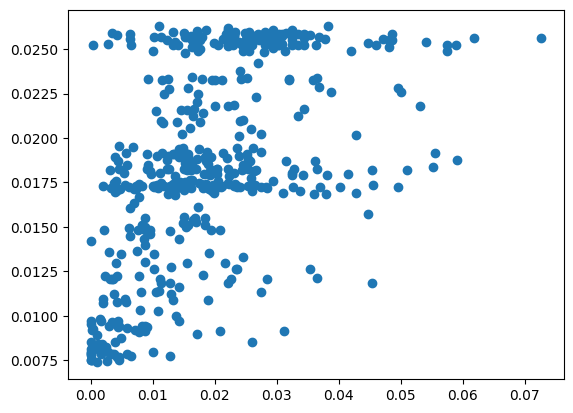

As we get higher in k value, it appears there's a more clearer grouping of points. There appears to be 3 distinct groups at 300 compared to at 3, 
where there seemed to be no such pattern.


5.


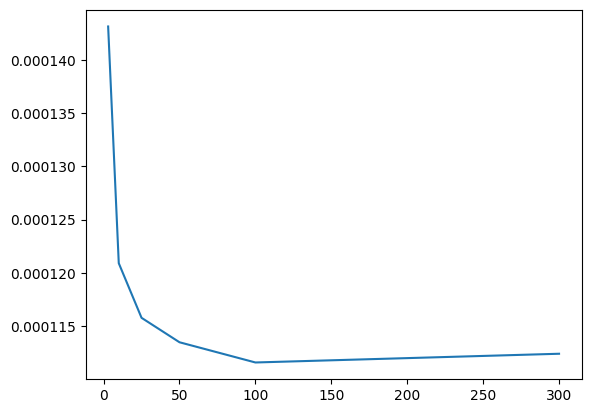

According to the elbow plot, it appears the most optimal k is 25, where the curve stops decreasing as much.


6.
What I believe is happening is that when the k values are small (below k = 25), the model is overfitting the data, 
and predicting values that are too close to the training data. This is because there's only a few neighbors to consider at first, 
so there's more sensitivity to what those few neighbors are classified as. 

This is reflected in the scatterplots, where predictions are tightly clustered around certain points rather than following a smooth trend. 
There may be more random spread or unnatural patterns in the scatter, showing that the model is reacting too much to individual data points. 

When the k is large like 300 (or over k = 25), the model is underfitting the data. This is because, at a certain point, 
we might hit k = the number of points in the data. When this happens, the predictions will be considering all points all at once, 
and would predict in cluster

In [44]:
#1. 
print("1.")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn as sk

cars_data = pd.read_csv('../data/USA_cars_datasets.csv')
cars_data.drop(['Unnamed: 0', 'brand', 'model', 'title_status', 'color', 'vin', 'lot', 'state', 'country', 'condition'], axis=1, inplace=True)

print(np.isnan(cars_data).sum())
print("According to the 0 sums for all 3 columns, there appears to be no missing or NA values in these 3 columns.")

print(cars_data.head())
print(cars_data.shape)
print("\n")


#2. 
print("2.")
norm_car = cars_data.copy()
min_car = np.min(norm_car)
max_car = np.max(norm_car)
norm_car = (norm_car - min_car) / (max_car - min_car)
print(norm_car.head(), "\n\n")


#3. 
print("3.")
X = norm_car.drop('price', axis=1)
y = norm_car['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


#4. 
print("4.")
ks = [3, 10, 25, 50, 100, 300]
error_results = []

for each in ks:
    knn = sk.neighbors.KNeighborsRegressor(n_neighbors=each)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    error = sk.metrics.mean_squared_error(y_test, y_pred)
    error_results.append(error)

    plt.scatter(y_test, y_pred)
    plt.show()

print("As we get higher in k value, it appears there's a more clearer grouping of points. There appears to be 3 distinct groups at 300 compared to at 3, \nwhere there seemed to be no such pattern.\n\n")


#5. 
print("5.")
plt.plot(ks, error_results)
plt.show()
print("According to the elbow plot, it appears the most optimal k is 25, where the curve stops decreasing as much.\n\n")


#6. 
print("6.")
print("What I believe is happening is that when the k values are small (below k = 25), the model is overfitting the data, \nand predicting values that are too close to the training data. This is because there's only a few neighbors to consider at first, \nso there's more sensitivity to what those few neighbors are classified as. \n\nThis is reflected in the scatterplots, where predictions are tightly clustered around certain points rather than following a smooth trend. \nThere may be more random spread or unnatural patterns in the scatter, showing that the model is reacting too much to individual data points. \n\nWhen the k is large like 300 (or over k = 25), the model is underfitting the data. This is because, at a certain point, \nwe might hit k = the number of points in the data. When this happens, the predictions will be considering all points all at once, \nand would predict in clusters that feel generalized to each other. \nThis would end up with a model that isn't able to detect nuances and trends within the dataset. \n\nThis is seen in the scatterplots, where the predicted values become too smoothed out and fail to follow the variations in actual prices. \nThe model starts to group predictions too closely together, and instead of capturing the dataset's structure, it averages everything out.")


**Q2.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on. 

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `cars_env.csv` data. 

The variables that go into the model are one more dimension to think about: We can use the train-test split approach to pick the variables that go into the model, not just the number of neighbors.

1. Load the data. We're going to use `footprint`, `baseline mpg`, `baseline price`, and `baseline sales`. Prepare some EDA results for these variables: describe tables, histograms/kernel density plots, scatterplots, etc. I renamed these variables to `footprint`, `mpg`, `price`, and `sales` to save time.
2. Maxmin normalize `footprint`, `mpg`, and `price`. These will be our features/covariates $X$. Our target/dependent/outcome variable $y$ will be sales. Does it make sense to normalize $y$?
3. Make a 30% train-test split of the data into 30% test/validation data and 70% training data. 
4. Using all three covariates --- `footprint`, `mpg`, and `price` --- what's the best $k$ to use? What SSE is achieved on the test set? To answer these questions, evalute the sum of squared error on the test set for a reasonable range of values of $k$ (perhaps 2 to 150), and find the $k$ with the lowest SSE. 
5. Do part 4 again, for each pair of variables: `footprint` and `mpg`, `footprint` and `price`, `mpg` and `price`.
6. Which set of variables from parts 4 and 5 does the best, in terms of minimizing SSE at the optimal choice of neighbors? Explain.

**Q4.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the features.
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

**Q5.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q6.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings. 
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.